**1. SCRAPPING**

**Langkah 1**

In [2]:
!pip3 install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Langkah 2**

In [3]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 5.2 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=731c78741f26ad06297239f5d1707f38d8764b010a7747d0ff1c35b2a1329142
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


**Langkah 3**

In [4]:
import snscrape.modules.twitter as sntwitter
import json
from langdetect import detect

**Langkah 4**

In [5]:
keywords=['korupsi']
start="2022–9–10"
end ="2022–10–17"
max_num=200
fname='tweet.json' 
languages=['id']

**Langkah 5**

In [6]:
import pandas as pd
datatweet=[]

**Langkah 6**

In [7]:
documents_twitter = []

for keyword in keywords:
   
    for i, tweet in enumerate (sntwitter.TwitterSearchScraper(f'{keyword} ').get_items()):
        
        try:
            lan=detect(tweet.content)
        except:
            lan='error'
        if i == max_num:
            break
        if lan in languages:
            data = {'id': tweet.id, 'username':tweet.username, 'date': tweet.date, 'text': tweet.content,'url':tweet.url}
            
            documents_twitter.append(data['text'])
            
            with open(fname, 'a+', encoding='utf-8') as f:
                line = json.dumps(data, ensure_ascii=False,default=str)
                print(line)
                f.write(line)
                f.write('\n')

{"id": 1581946745910489088, "username": "RadarKorupsi", "date": "2022-10-17 09:54:30+00:00", "text": "@Dpram_Back @kudu_piye_neh Lebih hijau lah hahah😅", "url": "https://twitter.com/RadarKorupsi/status/1581946745910489088"}
{"id": 1581946584375271424, "username": "Arief_2792", "date": "2022-10-17 09:53:51+00:00", "text": "@SantorinisSun Setara sama Foke nih orang... Cuma dulu pilgub 2012 nggak terlalu pake sentimen agama. Antara ketelan kinerjanya Foke digoreng, atau dulu partai yg nyalonin sendiri gubernur di putaran 1 belum ketahuan korupsi sapi", "url": "https://twitter.com/Arief_2792/status/1581946584375271424"}
{"id": 1581946487658774529, "username": "RadarKorupsi", "date": "2022-10-17 09:53:28+00:00", "text": "@alisyarief Kita tunggu setelah TSK dan berkas perkaranya diserahkan ke JPU. Ditahan gak di Kejaksaan ?", "url": "https://twitter.com/RadarKorupsi/status/1581946487658774529"}
{"id": 1581946343173812225, "username": "NenkMonica", "date": "2022-10-17 09:52:54+00:00", "text":

**Langkah 7**

In [8]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 5.0 MB/s 


**Langkah 8**

In [9]:
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()# stemming process
# import StopWordRemoverFactory class
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
documents_clean=[]

for d in datatweet:
    outputstem= stemmer.stem(d)
    d= stopword.remove(outputstem)
    # Remove Unicode
    document_test = re.sub(r'[^\x00-\x7F]+', ' ', d)
    # Remove Mentions
    document_test = re.sub(r'@\w+', '', document_test)
    # Lowercase the document
    document_test = document_test.lower()
    # Remove punctuations
    document_test = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', document_test)
    # Lowercase the numbers
    document_test = re.sub(r'[0-9]', '', document_test)
    # Remove the doubled space
    outputstop = re.sub(r'\s{2,}', ' ', document_test)
    documents_clean.append(outputstop)

**Langkah 9**

In [17]:
documents_clean[5]

'senin oktober kpu belitung timur laksana penandatangan fakta integritas lingkung kpu kabupaten belitung timur giat adalah program giat canang zona integritas tuju wilayah bebas korupsi'

**Langkah 10**

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

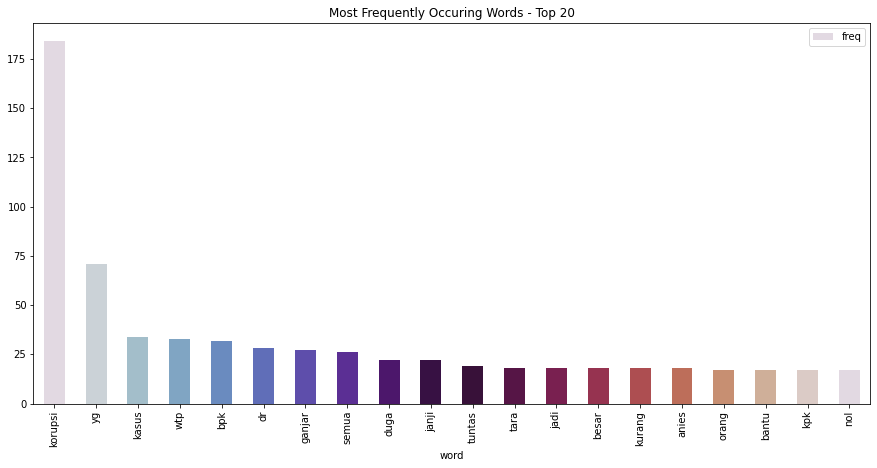

In [23]:
from sklearn.feature_extraction.text import CountVectorizer 
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
cv = CountVectorizer()
words = cv.fit_transform(documents_clean)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

**Langkah 11**

In [24]:
from sklearn.cluster import KMeans
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(words)

KMeans(max_iter=100, n_clusters=3, n_init=1)

**Langkah 12**

In [27]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names_out()

for i in range(true_k):
  print("Cluster %d:" % i),
  
  for ind in order_centroids[i, :10]:
      print(' %s' % terms[ind]),
  
  print()

Cluster 0:
 aniesnasdemout
 korupsi
 tenggelamkanpartainasdem
 tenggelamkannasdem
 goodbyenasdemanies
 tenggelamkananiesnasdem
 aniesgabenerpembohong
 kagagalananiesitunyata
 banten
 anies

Cluster 1:
 bpk
 ibadah
 rmh
 bantu
 macet
 moda
 bot
 tara
 janji
 canggih

Cluster 2:
 korupsi
 yg
 kasus
 ganjar
 duga
 kpk
 wtp
 islam
 orang
 jateng



**Langkah 13**

In [28]:
print("Prediction")
Y = cv.transform(["stadion"])
prediction = model.predict(Y)
print("Cluster number :", prediction)
Y = cv.transform(["jis"])
prediction = model.predict(Y)
print("Cluster number :", prediction)

Prediction
Cluster number : [2]
Cluster number : [2]


**Langkah 14**

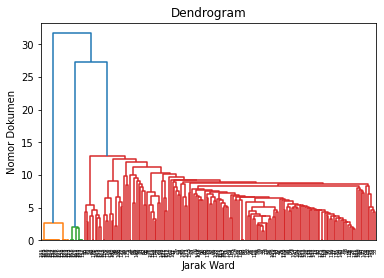

In [29]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward',metric='euclidean'),orientation="top")
plt.title('Dendrogram')
plt.xlabel('Jarak Ward')
plt.ylabel('Nomor Dokumen')
plt.show()

**Langkah 15**

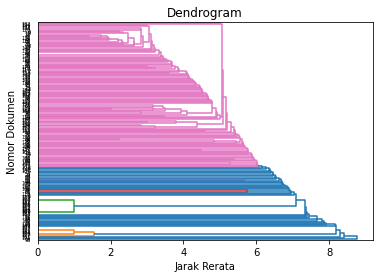

In [30]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average',metric='euclidean'),orientation="right")
plt.title('Dendrogram')
plt.xlabel('Jarak Rerata')
plt.ylabel('Nomor Dokumen')
plt.show()

**Langkah 16**

In [34]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X) 
print(cluster.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 4 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 4 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 2 0 0 1 0 1 1 0 1 0 3 0 1 3 0 0 0 1
 0 0 0 0 0 1 0 3 0 0 3 1 0 0 0 3 5 3 3 0 0 3 0 0 0 3 5 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 3 0 3 5 0 0 4 3 0 5 0 0 0 4 3 0 5 3 0 2 0 4 0 3 5 5 4 0 0 1 0 5 0
 3 0]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


**Langkah 17**

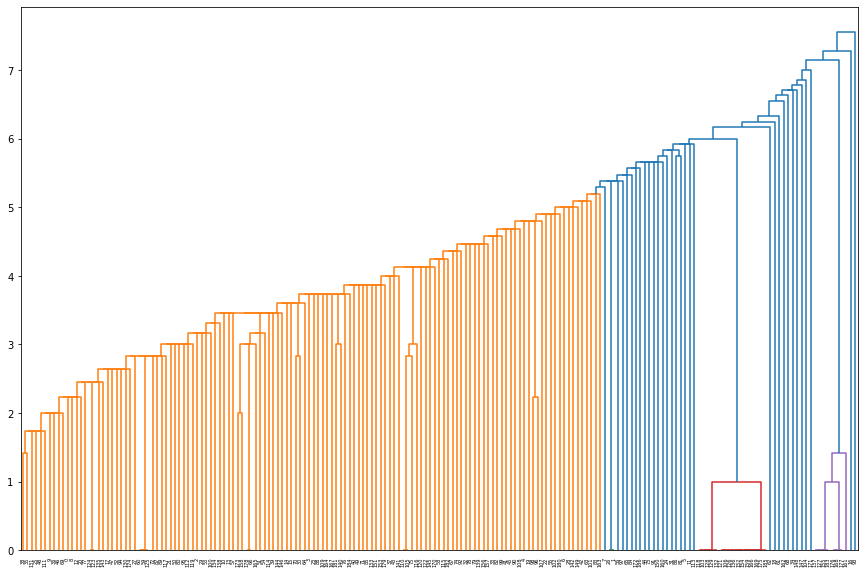

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(0, len(cluster.labels_))

plt.figure(figsize=(15, 10))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

**Langkah 18**

In [36]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='single')  
cluster.fit_predict(X) 
print(cluster.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 4 0 0 0 0 1 1 0 0 0 0 0 1 0
 0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
